In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy

In [181]:
sns.set()

# mergowanie danych

In [246]:
u = pd.read_csv("U.csv")

In [247]:
from collections import OrderedDict
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
od = OrderedDict([("Apr", "04"), ("Jan", "01"), ("Feb", "02"), ("Mar", "03"), ("May", "05"), ("Jun", "06"), ("Jul", "07"), ("Aug", "08"), ("Sep", "09"), ("Oct", "10"), ("Nov", "11"), ("Dec", "12")])
my_sentence = "This is my Jan and Dec is my Apr."
print(replace_all(my_sentence, od))
print(my_sentence)

This is my 01 and 12 is my 04.
This is my Jan and Dec is my Apr.


In [248]:
daty = pd.read_csv("U.csv").Date
dd = [d[-4:] +'-' + replace_all(d[:3], od) + "-" + d[4:6] for d in daty] 

In [253]:
u.Date = dd

In [254]:
jpy = pd.read_csv("JPY.csv")
aud = pd.read_csv("AUD.csv")
p = pd.merge(u, jpy, how="inner", on="Date")
DATA = pd.merge(p, aud, how="inner", on="Date")

DATA.dropna()

,Date,Price,Open_x,High_x,Low_x,Vol.,Change %,Open_y,High_y,Low_y,Close_x,Adj Close_x,Volume_x,Open,High,Low,Close_y,Adj Close_y,Volume_y
0,2023-04-04,101.267,101.735,101.950,101.140,15.26K,-0.51%,132.410004,133.169006,131.649994,131.766998,131.766998,0.0,1.47370,1.487630,1.471600,1.48140,1.48140,0.0
1,2023-04-03,101.787,102.270,102.745,101.560,16.16K,-0.39%,133.347000,133.731003,132.220993,133.347000,133.347000,0.0,1.50175,1.502880,1.473188,1.50175,1.50175,0.0
2,2023-03-31,102.186,101.905,102.305,101.730,12.30K,0.36%,133.201004,133.563995,132.725998,133.201004,133.201004,0.0,1.48880,1.498870,1.484080,1.48880,1.48880,0.0
3,2023-03-30,101.821,102.305,102.460,101.750,8.87K,-0.47%,132.576004,132.932999,132.222000,132.576004,132.576004,0.0,1.49645,1.500983,1.488716,1.49645,1.49645,0.0
4,2023-03-29,102.298,102.130,102.440,102.030,10.00K,0.19%,131.046005,132.697998,130.927994,131.046005,131.046005,0.0,1.49100,1.501006,1.489669,1.49100,1.49100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2018-04-10,88.870,89.095,89.110,88.825,0.05K,-0.27%,106.720001,107.392998,106.628998,106.749001,106.749001,0.0,1.29870,1.299700,1.287880,1.29877,1.29877,0.0
1289,2018-04-09,89.114,89.435,89.500,89.095,0.18K,-0.27%,106.949997,107.198997,106.852997,106.968002,106.968002,0.0,1.30225,1.306700,1.297200,1.30170,1.30170,0.0
1290,2018-04-06,89.357,89.655,89.780,89.330,0.10K,-0.40%,107.081001,107.454002,106.969002,107.052002,107.052002,0.0,1.30353,1.304200,1.298820,1.30407,1.30407,0.0
1291,2018-04-05,89.719,89.385,89.815,89.370,0.10K,0.40%,106.783997,107.481003,106.716003,106.774002,106.774002,0.0,1.29530,1.302700,1.294500,1.29534,1.29534,0.0


In [485]:
jpy = DATA.Close_x
aud = DATA.Close_y
jpy = jpy.fillna(np.mean(jpy))
aud = aud.fillna(np.mean(aud))
#jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
#aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])
usd = DATA.loc[:,"Change %"]
usdd = usd[::-1]
jpyd = jpy[::-1]
audd = aud[::-1]
jpy1 = np.diff(jpyd)/jpyd[:-1]*100
aud1 = np.diff(audd)/audd[:-1]*100

In [486]:
usd1 = [float(i[:-1]) for i in usdd]


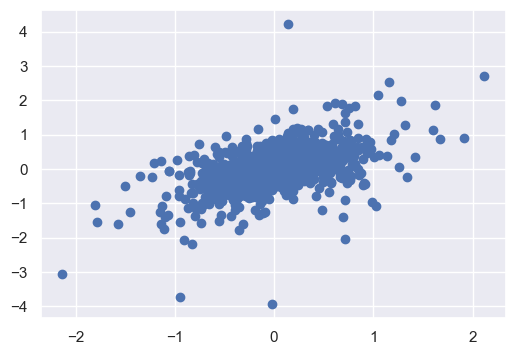

In [487]:
plt.scatter(usd1[:-1], jpy1)

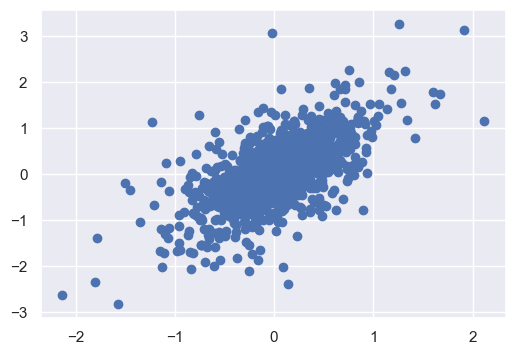

In [407]:
plt.scatter(usd1[:-1], aud1)

____________

In [8]:
#jpy = pd.read_csv("JPY.csv").Close
#aud = pd.read_csv("AUD.csv").Close
#jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
#aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

In [9]:
#jpy1 = np.diff(jpy)/jpy[:-1]*100
#aud1 = np.diff(aud)/aud[:-1]*100

In [10]:
port = 0.71*jpy + 0.29*aud
PORT = np.diff(port)/port[:-1]*100
port1 = 0.71*jpy1 + 0.29*aud1

In [12]:
#djia = pd.read_csv("DJIA.csv")
#djia = djia.iloc[:, 1].values

In [13]:
#for i in range(len(djia)-1):
#    if djia[i] == ".":
#        djia[i] = np.mean([float(djia[i-1]), float(djia[i+1])])

In [14]:
#for i in range(0,len(djia)):
#    djia[i] = float(djia[i])

In [15]:
#jpy1 = np.expand_dims(jpy1, axis=1)
#aud1 = np.expand_dims(aud1, axis=1)

In [16]:
#djia1 = np.diff(djia)/djia[:-1]*100

# REGRESJA JPY

In [431]:
djia1 = usd1[:-1]

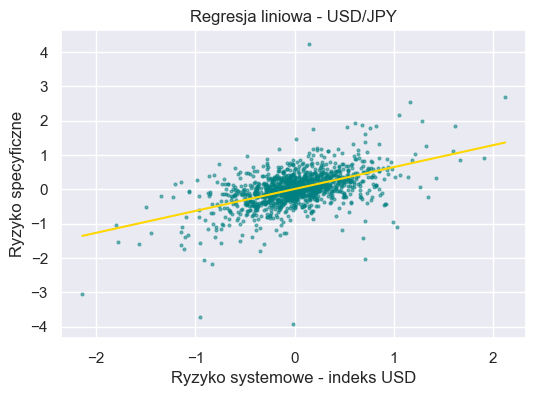

In [447]:
plt.scatter(djia1, jpy1, s=4, alpha=0.5,color="teal")
plt.plot([min(djia1), max(djia1)], [beta_jpy * min(djia1) + alpha_jpy, beta_jpy * max(djia1) + alpha_jpy], color="gold")
plt.xlabel("Ryzyko systemowe - indeks USD")
plt.ylabel("Ryzyko specyficzne")
plt.title("Regresja liniowa - USD/JPY")
plt.show()

# REGRESJA AUD

In [432]:
beta_aud=beta(djia1, aud1)
beta_aud

kowariancja: 0.18357867288868904
determinacja: 0.4060164460271399


0.99250448400314

In [442]:
alpha_aud=np.mean(aud1)-beta_aud*np.mean(djia1)
alpha_aud

0.001402781720825209

In [444]:
np.mean(aud1)

0.012249657350952407

In [304]:
res_aud = aud1 - alpha_aud - beta_aud*djia1 

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [414]:
np.mean(res_aud)

2.982861228228363e-16

In [415]:
np.std(res_aud)

0.6650875421216317

### Ala wbija na rejon

Sprawdze z tymi teoretycznymi wzorami

In [ ]:
σᵢ

In [298]:
def beta(R_i, R_m):
    cov = np.cov(R_i, R_m)
    cov = cov[0,1]
    print("kowariancja:",cov)
    beta = cov / np.var(R_i)
    determinacja = beta**2 * np.var(R_i) / np.var(R_m)
    print("determinacja:",determinacja)
    return beta

In [435]:
beta_jpy=beta(djia1, jpy1)
beta_jpy

kowariancja: 0.11810335841319536
determinacja: 0.2597564778937469


0.6385170507905366

In [436]:
alpha_jpy=np.mean(jpy1)-beta_jpy*np.mean(djia1)
alpha_jpy

0.011000137118593833

In [ ]:
np.mean(jpy1)

In [439]:
np.mean((alpha_jpy+beta_jpy*np.array(djia1)))

0.017978357518874305

In [464]:
#res_jpy = jpy1 - alpha_jpy - beta_jpy*djia1 

In [466]:
np.array(jpy1)

array([ 0.31756643,  0.260363  , -0.07846654, ...,  0.4714277 ,
        0.10960578, -1.18488005])

In [529]:
res_jpy2 = [np.array(jpy1)[i] - alpha_jpy-beta_jpy*np.array(djia1)[i] for i in range(len(jpy1))]
res_aud2 =[np.array(aud1)[i] - alpha_aud-beta_aud*np.array(djia1)[i] for i in range(len(jpy1))]

In [428]:
np.cov(res_aud2,djia1)

array([[ 0.32928846, -0.00062259],
       [-0.00062259,  0.18531056]])

In [124]:
np.mean(res_jpy)

1.5489189152682642e-16

In [209]:
np.mean(res_jpy2)

-5.448947360123468e-18

In [366]:
np.std(res_jpy)

0.5144542830662473

In [96]:
var = np.sum((jpy1[:,0] - alpha_jpy - beta_jpy * djia1) ** 2) / ( len(jpy1[:,0]) -1)
var

0.2639874259051767

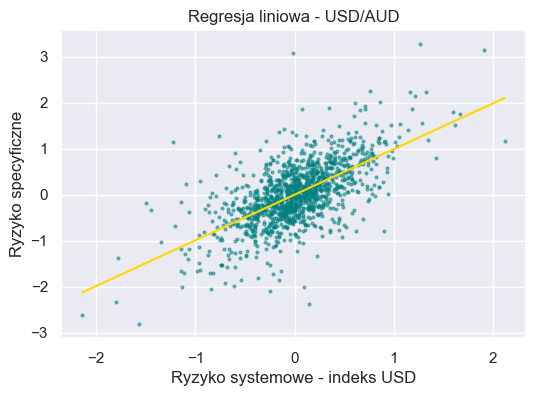

In [446]:
plt.scatter(djia1, aud1,s=4, alpha=0.5, color='teal')
plt.plot([min(djia1), max(djia1)], [beta_aud * min(djia1) + alpha_aud, beta_aud * max(djia1) + alpha_aud], color='gold')
plt.xlabel("Ryzyko systemowe - indeks USD")
plt.ylabel("Ryzyko specyficzne")
plt.title("Regresja liniowa - USD/AUD")
plt.show()

In [511]:
jpy_pred = alpha_jpy + beta_jpy*np.array(djia1)
aud_pred = alpha_aud + beta_aud*np.array(djia1)

In [449]:
np.mean(djia1)

0.010928792569659444

In [450]:
np.std(djia1)

0.4300756696405975

# LECIMY DALEJ

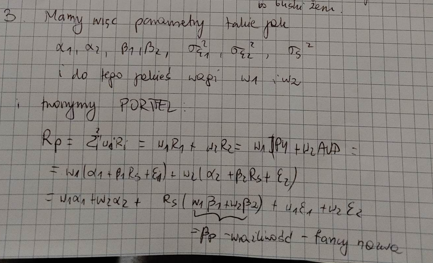

In [537]:
α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud = alpha_jpy, alpha_aud, beta_jpy, beta_aud, np.var(res_jpy2), np.var(res_aud2)

In [452]:
w_jpy, w_aud = 0.71, 0.29

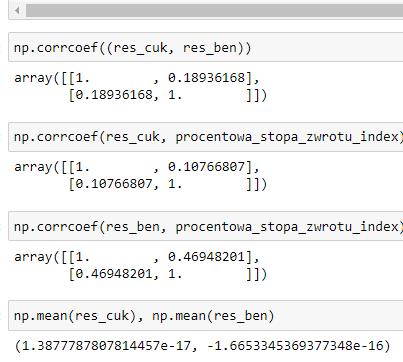

In [453]:
np.corrcoef((res_jpy[:,0].astype(float), res_aud[:,0].astype(float)))

array([[1.        , 0.29777735],
       [0.29777735, 1.        ]])

In [454]:
np.corrcoef((res_jpy2, djia1))

array([[1.        , 0.01241817],
       [0.01241817, 1.        ]])

In [455]:
np.corrcoef((res_aud2, djia1))

array([[1.        , 0.01108065],
       [0.01108065, 1.        ]])

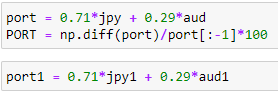

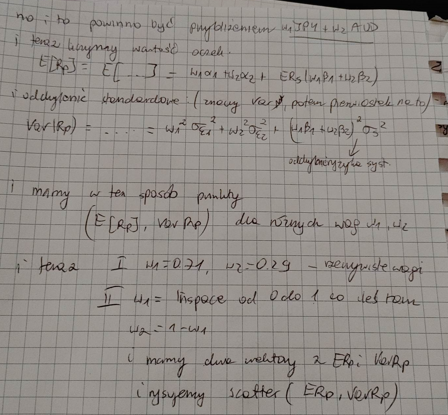

In [482]:
def jazda(Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    
    nazwy = ['Średnia jpy',
             'Średnia aud',
             'Odchylenie std jpy',
             'Odchylenie std aud',
             'Współczynnik korelacji']
    varB = np.sqrt(se_B+(beta_B**2)*np.var(Rs, ddof=1))
    varA = np.sqrt(se_A+(beta_A**2)*np.var(Rs, ddof=1))
    wartosci = [alpha_A + beta_A*np.mean(Rs), alpha_B + beta_B*np.mean(Rs),
                varA, varB,
                beta_A*beta_B*np.var(Rs, ddof=1)/np.sqrt(varA*varB)]
    #beta_A*beta_B*np.var(Rs, ddof=1)/np.sqrt(varA*varB)
    return pd.DataFrame({'Parametr':nazwy, 'Wartość': wartosci})

In [483]:
jazda(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

,Parametr,Wartość
0,Średnia jpy,0.017978
1,Średnia aud,0.012250
2,Odchylenie std jpy,0.583209
3,Odchylenie std aud,0.790370
4,Współczynnik korelacji,0.172784


In [478]:
np.std(jpy_pred, ddof=1)

0.5390168174475685

In [479]:
np.std(aud_pred, ddof=1)

0.6701525504390549

In [474]:
np.mean(jpy_pred)

0.0179783575188743

In [475]:
np.mean(aud_pred)

0.012249657350952405

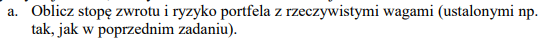

Text(0, 0.5, 'Zmiany portfela [%]')

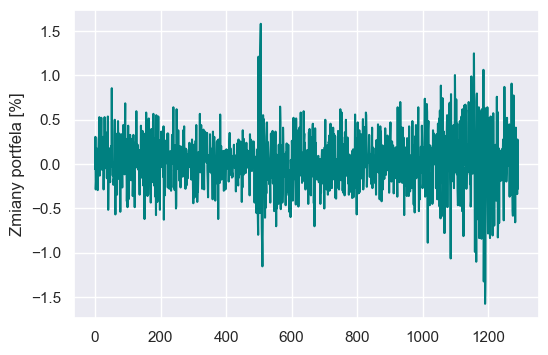

In [512]:
port_pred = 0.71*jpy_pred+0.29*aud_pred
plt.plot(port_pred, color = 'teal')
plt.ylabel("Zmiany portfela [%]")


In [513]:
np.std(port_pred, ddof=1)

0.31888408012691705

In [544]:
def portfel(w1, w2, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    nazwy = ['stopa zwrotu', 'ryzyko']
    st = w1*alpha_A + w2*alpha_B + (w1*beta_A + w2*beta_B)*np.mean(Rs)
    ryzyko = np.sqrt(w1**2*se_A**2 + w2**2*se_B**2 +(w1*beta_A + w2*beta_B)**2 * np.var(Rs))
    wartosci = [st, ryzyko]
    print(w1*beta_A + w2*beta_B)
    return pd.DataFrame({'Parametr':nazwy, 'Wartość': wartosci})

In [545]:
portfel(w_jpy, w_aud, djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

0.7411734064221915


,Parametr,Wartość
0,stopa zwrotu,0.016317
1,ryzyko,0.361805


In [546]:
def zwroc_portfel(w1, w2, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    st = w1*alpha_A + w2*alpha_B + (w1*beta_A + w2*beta_B)*np.mean(Rs)
    ryzyko = np.sqrt(w1**2*se_A + w2**2*se_B +(w1*beta_A + w2*beta_B)**2 * np.var(Rs))
    wartosci = [st, ryzyko]
    
    return wartosci

In [547]:
def rysuj_portfel(Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B, show=1):
    
    wA = np.arange(0,1.01,0.01)
    
    st, ryzyko = [], []
    for i in wA:
        wB= 1 - i
        data = zwroc_portfel(i, wB, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B)
        st.append(data[0])
        ryzyko.append(data[1])
        
    plt.plot(ryzyko, st)
    plt.title('Wykres możliwych portfeli dla wag od 0.01 do 0.99')
    plt.xlabel('sigma_b')
    plt.ylabel('ER_b')
    if show == 1:
        plt.show()
    #return st, ryzyko

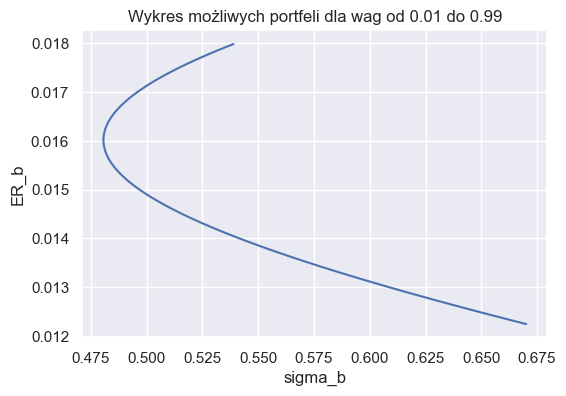

In [548]:
rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

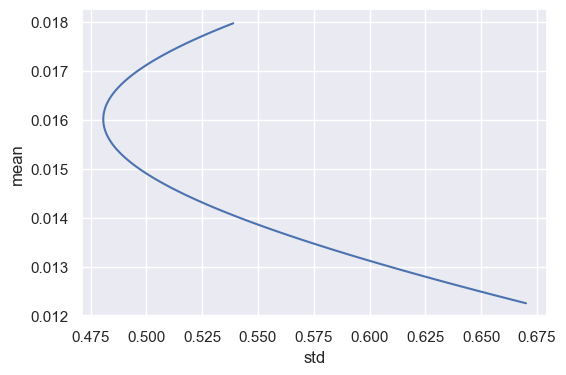

In [549]:
plt.plot(qq["STD"], qq["ŚREDNIA"])
plt.xlabel("std")
plt.ylabel("E[R]")

#opt = wAA*jpy_pred + (1-wAA)*aud_pred
#plt.scatter(np.std(opt, ddof=1),np.mean(opt), color="pink")
plt.show()

In [550]:
wA = np.arange(0,1.1,0.1)
wB = 1-wA
wB

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [551]:
wA = np.arange(0,1.05,0.05)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = zwroc_portfel(w, (1-w), djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)
    ms.append(data[0])
    st.append(data[1])
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)
qq

,portfel,ŚREDNIA,STD
0,0.0JPY + 1.0AUD,0.012250,0.670104
1,0.05JPY + 0.95AUD,0.012536,0.645848
2,0.1JPY + 0.9AUD,0.012823,0.622676
3,0.15JPY + 0.85AUD,0.013109,0.600713
4,0.2JPY + 0.8AUD,0.013395,0.580096
5,0.25JPY + 0.75AUD,0.013682,0.560975
6,0.3JPY + 0.7AUD,0.013968,0.543507
7,0.35JPY + 0.65AUD,0.014255,0.527855
8,0.4JPY + 0.6AUD,0.014541,0.514186
9,0.45JPY + 0.55AUD,0.014828,0.502662


In [552]:
print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

MIN RYZYKO:
 portfel    0.65JPY + 0.35AUD
ŚREDNIA             0.015973
STD                 0.480675
Name: 13, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017978
STD               0.538916
Name: 20, dtype: object


In [553]:
##troche dokładniej, no problemo malenka
wA = np.arange(0,1.01,0.01)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = zwroc_portfel(w, (1-w), djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)
    ms.append(data[0])
    st.append(data[1])
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)
display(qq)
print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

,portfel,ŚREDNIA,STD
0,0.0JPY + 1.0AUD,0.012250,0.670104
1,0.01JPY + 0.99AUD,0.012307,0.665171
2,0.02JPY + 0.98AUD,0.012364,0.660279
3,0.03JPY + 0.97AUD,0.012422,0.655427
4,0.04JPY + 0.96AUD,0.012479,0.650616
...,...,...,...
96,0.96JPY + 0.04AUD,0.017749,0.526671
97,0.97JPY + 0.03AUD,0.017806,0.529616
98,0.98JPY + 0.02AUD,0.017864,0.532639
99,0.99JPY + 0.01AUD,0.017921,0.535740


MIN RYZYKO:
 portfel    0.66JPY + 0.34AUD
ŚREDNIA             0.016031
STD                 0.480654
Name: 66, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017978
STD               0.538916
Name: 100, dtype: object


In [554]:
σ2_jpy

0.2150199812082919

In [555]:
#PORTFRL NASZ
nasz= qq.iloc[71]
nasz

portfel    0.71JPY + 0.29AUD
ŚREDNIA             0.016317
STD                 0.482121
Name: 71, dtype: object

In [557]:
##najdokładniej - ze wzorku PRZEKONAJMY SIE
sj = np.sqrt(σ2_jpy+(β_jpy**2)*np.var(djia1, ddof=1))
sa = np.sqrt(σ2_aud+(β_aud**2)*np.var(djia1, ddof=1))
cor = β_jpy * β_aud*np.var(djia1, ddof=1)/sj/sa
mr = (sa**2-sa*sj*cor)/(sa**2 + sj**2 - 2*sa*sj*cor) ##minimalne ryzyko
mr

0.6571033679676455

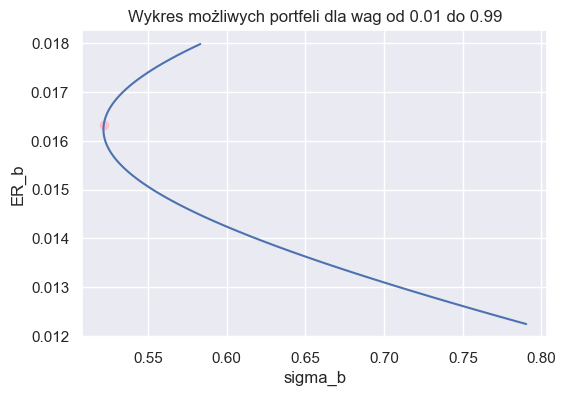

In [503]:

rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud, show=0)
plt.scatter(0.52173,0.016317, color="pink")
plt.show()

In [199]:
plt.rcParams["figure.figsize"] = (6,4)

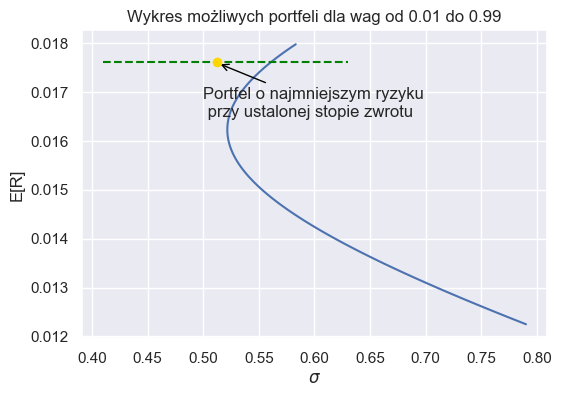

In [504]:
ulsko = 0.017624

# wagi aud: 0  jpy: 1

fig, ax = plt.subplots()
#ax.plot([0, 1],[0, 1])
rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud, show=0)
plt.xlabel("$\sigma$")
plt.ylabel("E[R]")
ax.plot([0.41,0.63],[ulsko, ulsko], "--", color = "green")
ax.annotate("Portfel o najmniejszym ryzyku \n przy ustalonej stopie zwrotu", xy=(0.5131, 0.01759), xytext=(0.5, 0.0165), arrowprops={"arrowstyle":"->", "color":"black"})
ax.scatter(0.5124, ulsko, zorder = 4, color = "gold") 
plt.show()